In [2]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  8
GPU Name:  NVIDIA A100-SXM4-40GB
Using device: cuda


In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
# Read train data
train_path = "/home/srmist19/Traffic_Signs_Dataset/DATA"
class_folders = os.listdir(train_path)

image_counts = {}
for class_folder in class_folders:
    path = os.path.join(train_path, class_folder)
    image_count = len(os.listdir(path))
    class_number_train = class_folders.index(class_folder)
    image_counts[class_folder] = image_count

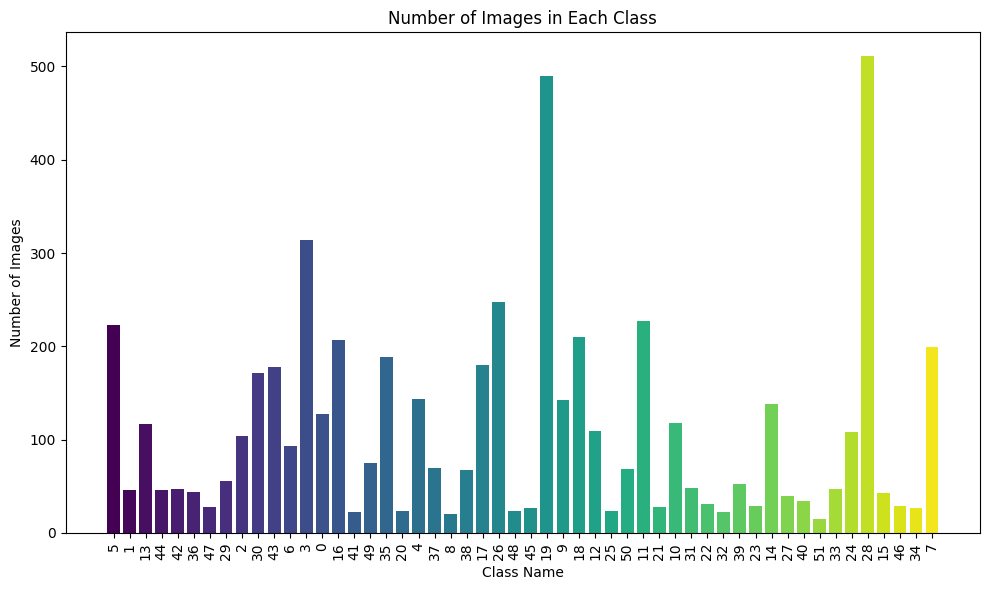

In [5]:
# Display quantity chart
color_map = cm.viridis
colors = [color_map(i / len(image_counts)) for i in range(len(image_counts))]
plt.figure(figsize=(10, 6))
bars = plt.bar(image_counts.keys(), image_counts.values(), color=colors)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

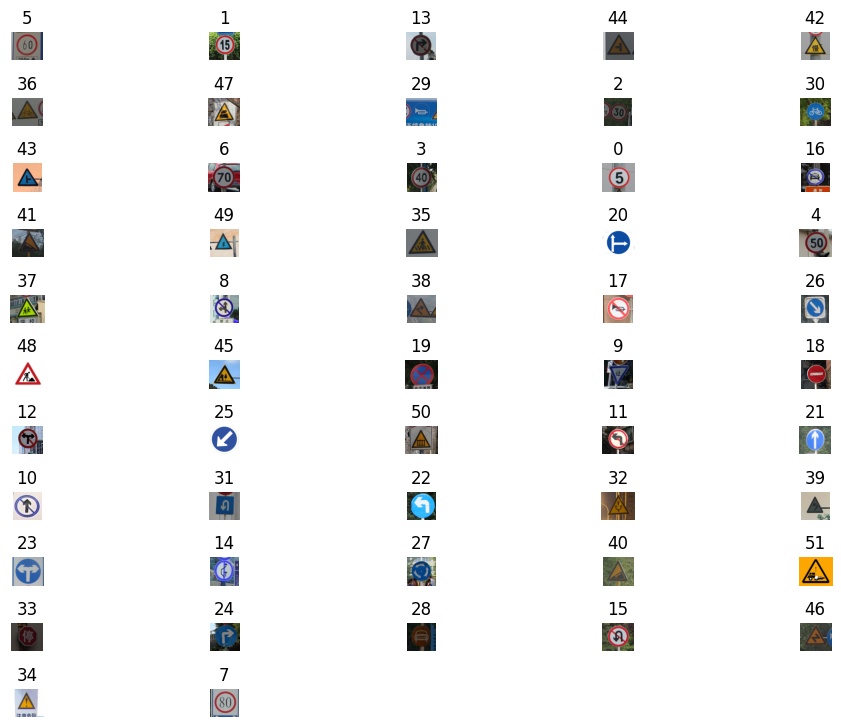

In [6]:
# Display images of traffic signs
plt.figure(figsize=(10, 10))
for i, folder in enumerate(class_folders):
    path = os.path.join(train_path, folder)
    plt.subplot(15, 5, i+1)
    for j, img in enumerate(os.listdir(path)):
        if j >= 1:
            break
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(folder)
        plt.axis('off')
plt.subplots_adjust(hspace=5, wspace=0.5)
plt.tight_layout()
plt.show()

In [8]:
# Read the label file
path_label = '/home/srmist19/Traffic_Signs_Dataset/labels.csv'
df = pd.read_csv(path_label)

In [9]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Unknown7


In [10]:
df.info()
class_label = len(df)
print('The number of labels is : ', class_label)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  52 non-null     int64 
 1   Name     52 non-null     object
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes
The number of labels is :  52


In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(10),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),
        scale=(0.85, 1.15),
        shear=0.15,
        fill=0
    ),
    transforms.ToTensor(),  # Rescales to [0, 1]
])

Using device: cuda


In [12]:
# Load dataset
dataset = datasets.ImageFolder(root=train_path, transform=train_transforms)

# Split dataset into train and validation (80-20)
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(0.2 * dataset_size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

# Create DataLoaders
train_images = DataLoader(dataset, batch_size=32, sampler=train_sampler, num_workers=2, pin_memory=True)
val_images = DataLoader(dataset, batch_size=32, sampler=val_sampler, num_workers=2, pin_memory=True)

# View class indices
print(dataset.class_to_idx)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '6': 48, '7': 49, '8': 50, '9': 51}


In [13]:
import torch
import torch.nn as nn
from torchvision.models import resnet152

# Load pre-trained ResNet152
pre_trained_model = resnet152(pretrained=True).to(device)
# Remove the final fully connected layer (equivalent to include_top=False)
pre_trained_model.fc = nn.Identity()

# Extract features up to a specific layer (approximating 'conv5_block2_out')
class FeatureExtractor(nn.Module):
    def __init__(self, original_model):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(*list(original_model.children())[:-2])  # Up to layer4 (conv5 equivalent)

    def forward(self, x):
        return self.features(x)

base_model = FeatureExtractor(pre_trained_model).to(device)

# Freeze layers
for param in base_model.parameters():
    param.requires_grad = False

# Check model structure (equivalent to summary())
print(base_model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): C

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Assuming model, train_images, val_images, device are defined
# Update model to remove softmax
class TrafficSignModel(nn.Module):
    def __init__(self, base_model, num_classes):
        super(TrafficSignModel, self).__init__()
        self.base_model = base_model
        self.conv = nn.Conv2d(2048, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 128)  # Fixed typo from 'maticSignModel512'
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = self.conv(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Instantiate model (assuming base_model and class_label are defined)
model = TrafficSignModel(base_model, class_label).to(device)

# Unfreeze layer4 of base_model
for name, param in model.base_model.named_parameters():
    if "layer4" in name:
        param.requires_grad = True

# Optimizer, loss, and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Early stopping
class EarlyStopping:
    def __init__(self, threshold=0.99):
        self.threshold = threshold
        self.stop = False

    def check(self, accuracy):
        if accuracy > self.threshold:
            print(f"\nReached {self.threshold*100}% accuracy so cancelling training!")
            self.stop = True

callbacks = EarlyStopping()

In [22]:
# Training loop
print('----------------------------Model is being built......................\n')
model.train()
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
for epoch in range(100):
    train_loss, train_correct, train_total = 0, 0, 0
    for images, labels in train_images:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    val_loss, val_correct, val_total = 0, 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in val_images:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    model.train()

    epoch_train_loss = train_loss / len(train_images)
    epoch_val_loss = val_loss / len(val_images)
    epoch_train_acc = train_correct / train_total
    epoch_val_acc = val_correct / val_total

    history['loss'].append(epoch_train_loss)
    history['val_loss'].append(epoch_val_loss)
    history['accuracy'].append(epoch_train_acc)
    history['val_accuracy'].append(epoch_val_acc)

    print(f"Epoch {epoch+1}/100, Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, "
          f"Accuracy: {epoch_train_acc:.4f}, Val Accuracy: {epoch_val_acc:.4f}")

    scheduler.step(epoch_val_loss)
    callbacks.check(epoch_train_acc)
    if callbacks.stop:
        break

print('\n----------------------------Model completed......................\n')

----------------------------Model is being built......................

Epoch 1/100, Loss: 1.9864, Val Loss: 1.2566, Accuracy: 0.4678, Val Accuracy: 0.6725
Epoch 2/100, Loss: 1.0891, Val Loss: 0.8932, Accuracy: 0.6723, Val Accuracy: 0.7306
Epoch 3/100, Loss: 0.8968, Val Loss: 0.8460, Accuracy: 0.7211, Val Accuracy: 0.7606
Epoch 4/100, Loss: 0.7175, Val Loss: 0.7042, Accuracy: 0.7730, Val Accuracy: 0.7799
Epoch 5/100, Loss: 0.6283, Val Loss: 0.8135, Accuracy: 0.8018, Val Accuracy: 0.7641
Epoch 6/100, Loss: 0.6313, Val Loss: 0.6245, Accuracy: 0.8080, Val Accuracy: 0.8046
Epoch 7/100, Loss: 0.5406, Val Loss: 0.6120, Accuracy: 0.8274, Val Accuracy: 0.7975
Epoch 8/100, Loss: 0.5116, Val Loss: 0.5027, Accuracy: 0.8373, Val Accuracy: 0.8407
Epoch 9/100, Loss: 0.4631, Val Loss: 0.3987, Accuracy: 0.8535, Val Accuracy: 0.8706
Epoch 10/100, Loss: 0.4360, Val Loss: 0.5189, Accuracy: 0.8628, Val Accuracy: 0.8407
Epoch 11/100, Loss: 0.4283, Val Loss: 0.3945, Accuracy: 0.8597, Val Accuracy: 0.8715
Ep

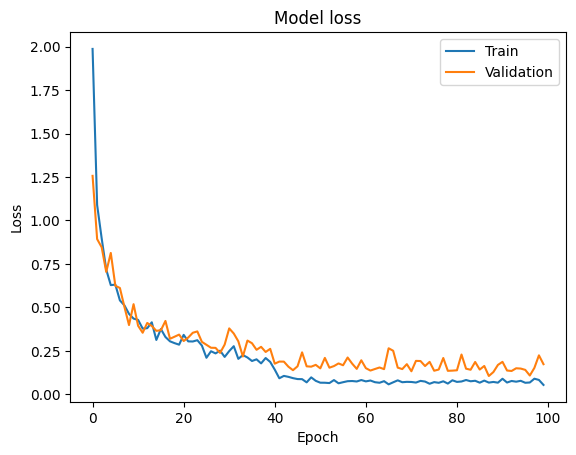

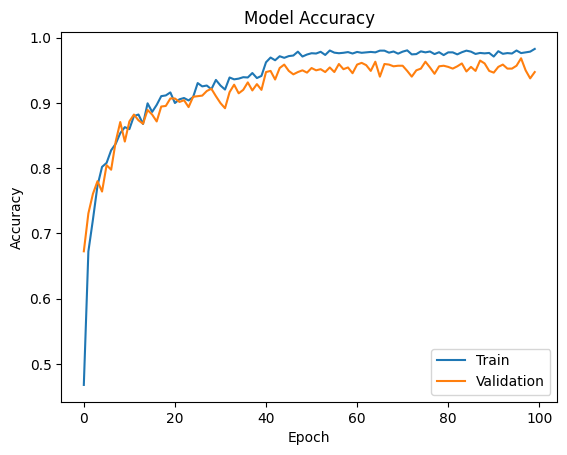

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Number of test data :  433
NameID :  5
              precision    recall  f1-score   support

           5       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6
          13       1.00      1.00      1.00        12
          44       0.80      0.91      0.85        22
          42       1.00      1.00      1.00         9
          36       0.77      0.91      0.83        11
          47       1.00      1.00      1.00         2
          29       1.00      0.87      0.93        15
           2       1.00      1.00      1.00        11
          30       1.00      0.79      0.88        14
          43       1.00      0.80      0.89        10
           6       1.00      1.00      1.00        10
           3       0.91      1.00      0.95        10
           0       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         8
          41       0.50      0.60      0.55         5
          49       1.00      0.43      0.6

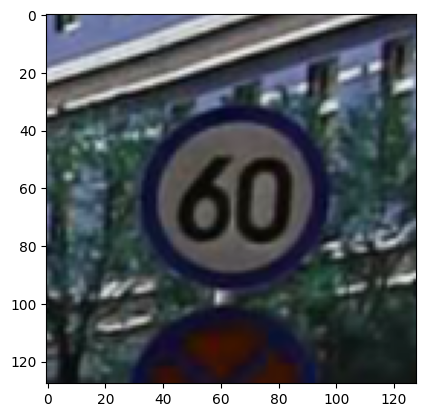

In [24]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# Create test dataset
directory_test = "/home/srmist19/Traffic_Signs_Dataset/TEST"
class_name_test = os.listdir(directory_test)
test_arrays = []

for class_name in class_name_test:
    path = os.path.join(directory_test, class_name)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (128, 128))
        test_arrays.append([img_array, class_name])

print('Number of test data : ', len(test_arrays))

X_train = []
Y_train = []
for features, label in test_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train = np.array(X_train) / 255.0

print('NameID : ', Y_train[0])
plt.imshow(X_train[0])

# One-hot encode labels
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.transpose(0, 3, 1, 2), dtype=torch.float32).to(device)  # NCHW format
Y_train = torch.tensor(Y_train, dtype=torch.long).to(device)

# Predict
model.eval()
with torch.no_grad():
    predictions = model(X_train)
    predicted_classes = torch.argmax(predictions, dim=1).cpu().numpy()
    true_classes = torch.argmax(Y_train, dim=1).cpu().numpy()

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_name_test)
print(report)